<a href="https://colab.research.google.com/github/Ankitha45/Assignment-2/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# Step 1: Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer

In [2]:
# Load the auto-mpg dataset
a_df = pd.read_csv('auto-mpg.csv')
a_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


**# Step 1: Data Type Exploration and Cleaning**

In [3]:
# Check the data types of the columns
print("\nData types of each column:")
print(a_df.dtypes)


Data types of each column:
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [4]:
# Fixing horsepower by converting to numeric and replacing '?' with NaN
a_df['horsepower'] = pd.to_numeric(a_df['horsepower'], errors='coerce')

In [5]:
# Rechecking the data types
print("\nData types after fixing 'horsepower':")
print(a_df.dtypes)


Data types after fixing 'horsepower':
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


**# Step 2: Split the data**

In [6]:
# Step 2: Split the data into 75% training and 25% testing
a_train_df, a_test_df = train_test_split(a_df, test_size=0.25, random_state=42)

print("\nTraining data shape:", a_train_df.shape)
print("Testing data shape:", a_test_df.shape)


Training data shape: (298, 9)
Testing data shape: (100, 9)


**# Step 3: Visualize necessary columns**

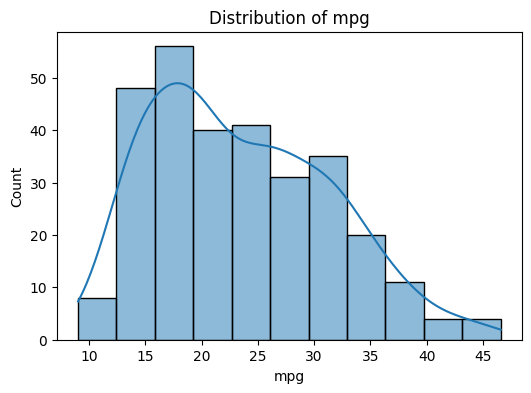

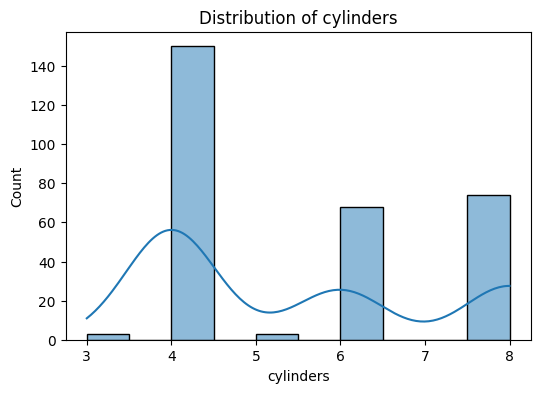

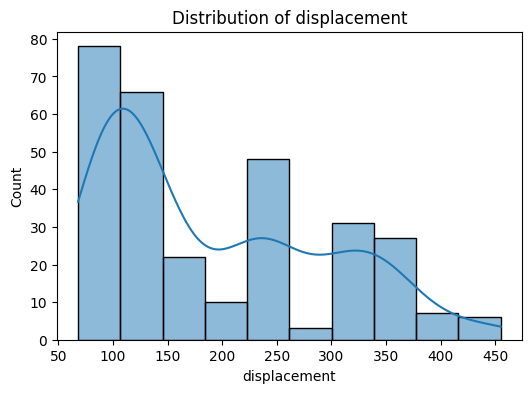

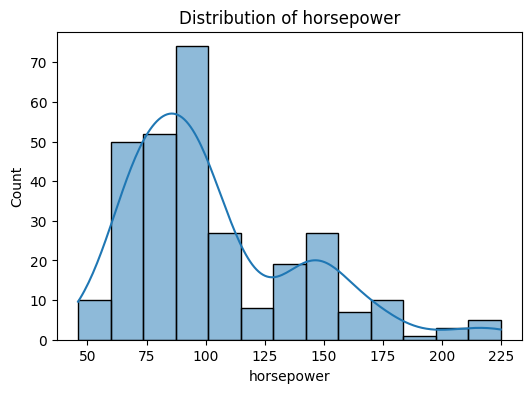

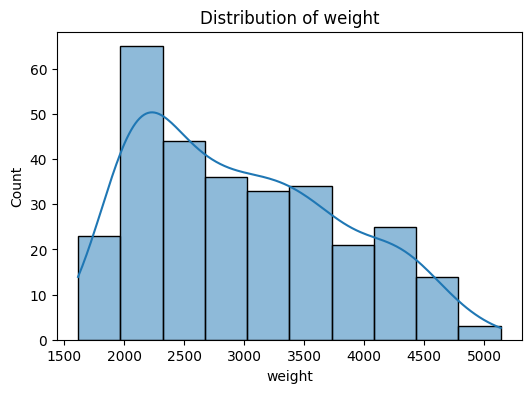

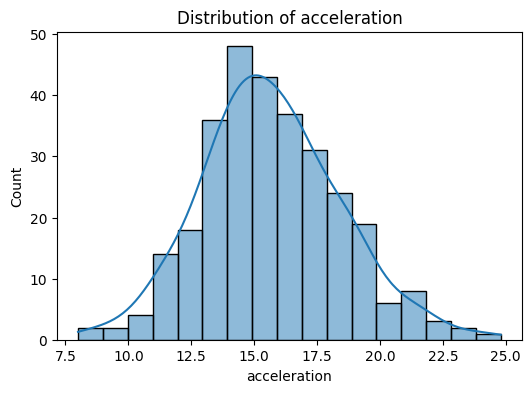

In [7]:
a_numeric_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

# Plotting distributions of numeric columns
for col in a_numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(a_train_df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [8]:
a_numeric_symmetric = ['mpg', 'weight']
a_numeric_skewed = ['cylinders', 'displacement', 'horsepower', 'acceleration']

# The column 'origin' and 'car name' are categorical:
a_categorical_columns = ['origin', 'car name']

**# Step 4: Build a pipeline for data preprocessing**

In [9]:
# Function to apply log transformation (to handle skewed data)
def a_log_transform(x):
    return np.log1p(x)

In [10]:
# Pipelines for each type of columns
a_symmetric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

a_skewed_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transform', FunctionTransformer(a_log_transform, validate=True)),
    ('scaler', StandardScaler())
])

a_categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [11]:
# Combine the preprocessing steps
a_preprocessor = ColumnTransformer([
    ('symmetric', a_symmetric_pipeline, a_numeric_symmetric),
    ('skewed', a_skewed_pipeline, a_numeric_skewed),
    ('categorical', a_categorical_pipeline, a_categorical_columns)
])

**# Step 5: Fit the pipeline on the training data**

In [12]:
a_preprocessor.fit(a_train_df)

# Transform both training and testing data
a_train_processed = a_preprocessor.transform(a_train_df)
a_test_processed = a_preprocessor.transform(a_test_df)

**# Step 6: Output the shape of processed data**

In [13]:
print("\nProcessed training data shape:", a_train_processed.shape)
print("Processed testing data shape:", a_test_processed.shape)


Processed training data shape: (298, 241)
Processed testing data shape: (100, 241)


In [14]:
# Convert the sparse matrix to a pandas DataFrame
a_train_processed_df = pd.DataFrame.sparse.from_spmatrix(a_train_processed)
a_train_processed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
0,1.592572,-1.41547,-0.885542,-1.026188,-1.185723,-0.38163,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.193397,-0.720167,-0.885542,-0.84185,-0.114815,0.375002,0,0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.700055,-0.245824,0.454639,0.320884,-0.019464,0.026731,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.82672,0.832557,1.455633,1.129272,1.306387,-1.616542,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.700055,0.576772,0.454639,0.755993,0.221199,0.203428,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Save processed dataset in csv format
a_train_df.to_csv('a_train_processed.csv', index=False)
a_test_df.to_csv('a_test_processed.csv', index=False)

# Save processed dataset in numpy format
np.save('a_train_processed.npy', a_train_processed)
np.save('a_test_processed.npy', a_test_processed)